# Day 51 – Activation Functions & Loss Functions

## Objective
Improve MNIST model performance by applying correct activation functions and loss functions.

## Key Concepts
- ReLU for hidden layers
- Softmax for multi-class output
- Sparse Categorical Crossentropy for integer labels


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8556 - loss: 0.4862 - val_accuracy: 0.9621 - val_loss: 0.1350
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9651 - loss: 0.1197 - val_accuracy: 0.9671 - val_loss: 0.1089
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9764 - loss: 0.0794 - val_accuracy: 0.9718 - val_loss: 0.1009
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9837 - loss: 0.0557 - val_accuracy: 0.9728 - val_loss: 0.0941
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9759 - val_loss: 0.0931
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.9772 - val_loss: 0.0940
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9764 - val_loss: 0.0973
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9943 - loss: 0.0177

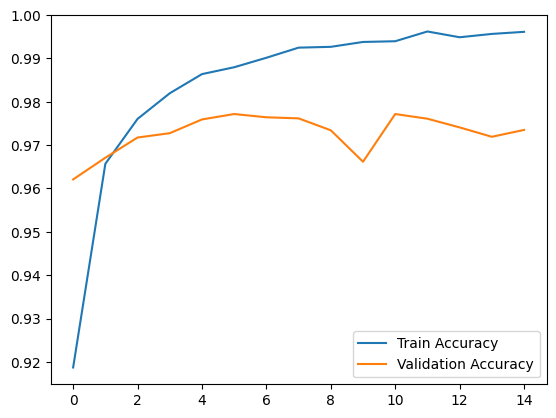

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0

# Build improved model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile with correct loss
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
